In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data=pd.read_csv('cleaned_dataset.csv')

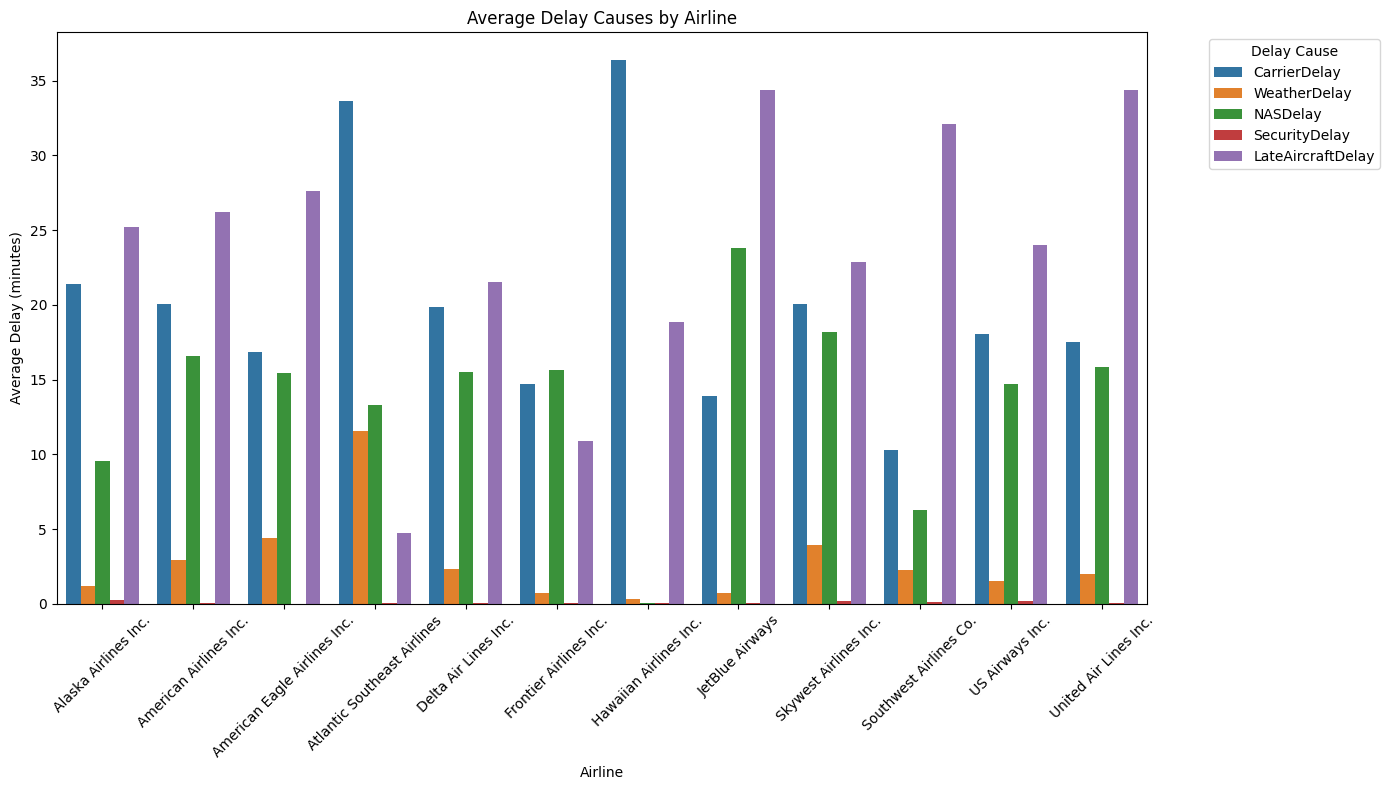

In [0]:
# Compare delay causes by airline
delay_causes = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_by_airline = data.groupby('Airline')[delay_causes].mean().reset_index()
delay_by_airline_melted = delay_by_airline.melt(id_vars='Airline', var_name='DelayCause', value_name='AverageDelay')

plt.figure(figsize=(14,8))
sns.barplot(data=delay_by_airline_melted, x='Airline', y='AverageDelay', hue='DelayCause')
plt.title('Average Delay Causes by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-97b14bba-cf5e-431a-bfe0-f5/.ipykernel/2628/command-4749882578840940-3252356631:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carrier_delay_by_airline, x='Airline', y='CarrierDelay', palette='Blues_d')


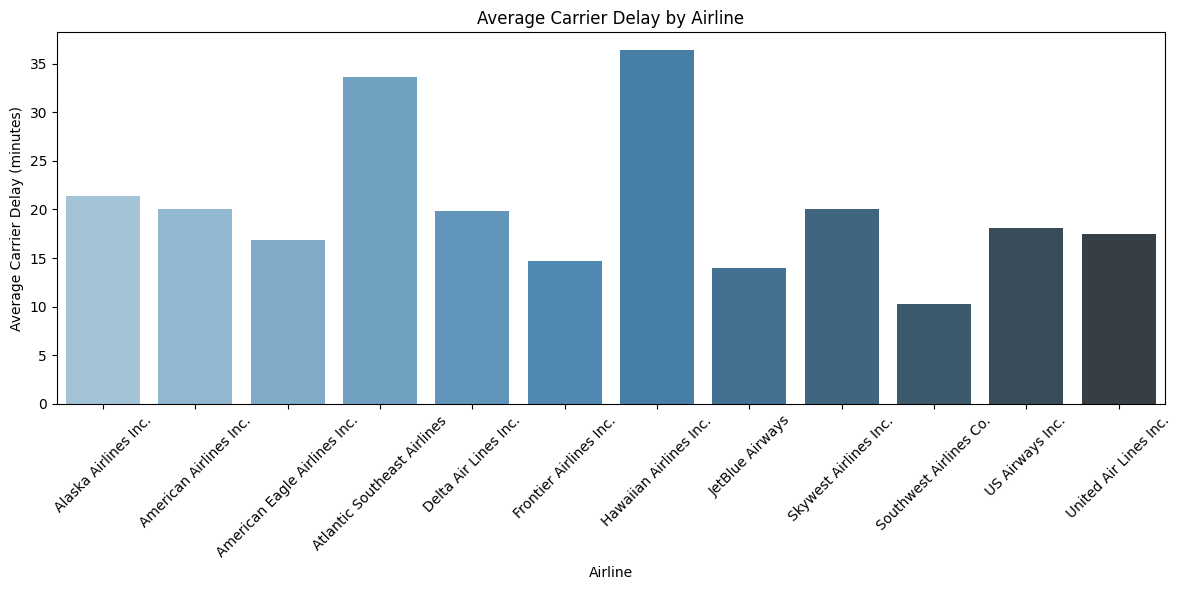

In [0]:
# Explore Carrier Delays
carrier_delay_by_airline = data.groupby('Airline')['CarrierDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=carrier_delay_by_airline, x='Airline', y='CarrierDelay', palette='Blues_d')
plt.title('Average Carrier Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Carrier Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

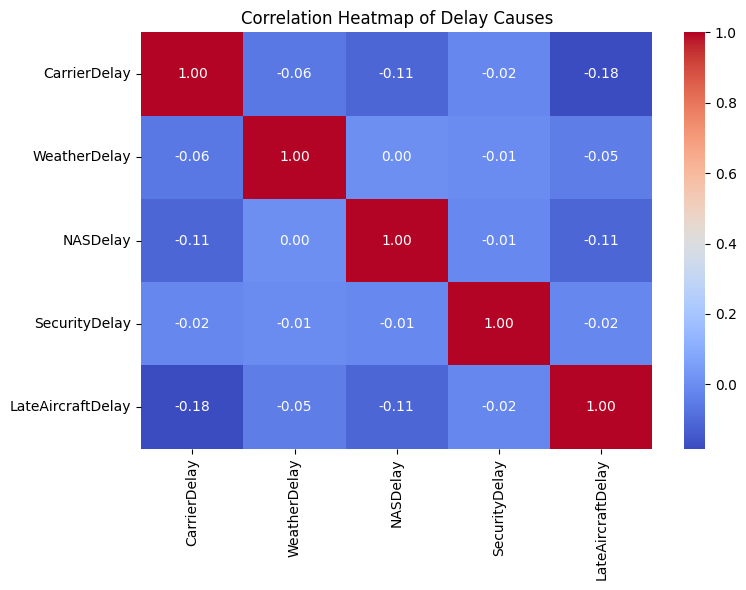

In [0]:
# Heatmap: Correlation between delay causes
plt.figure(figsize=(8,6))
corr = data[delay_causes].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Delay Causes')
plt.tight_layout()
plt.show()

/home/spark-97b14bba-cf5e-431a-bfe0-f5/.ipykernel/2628/command-4749882578840942-3995558232:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')


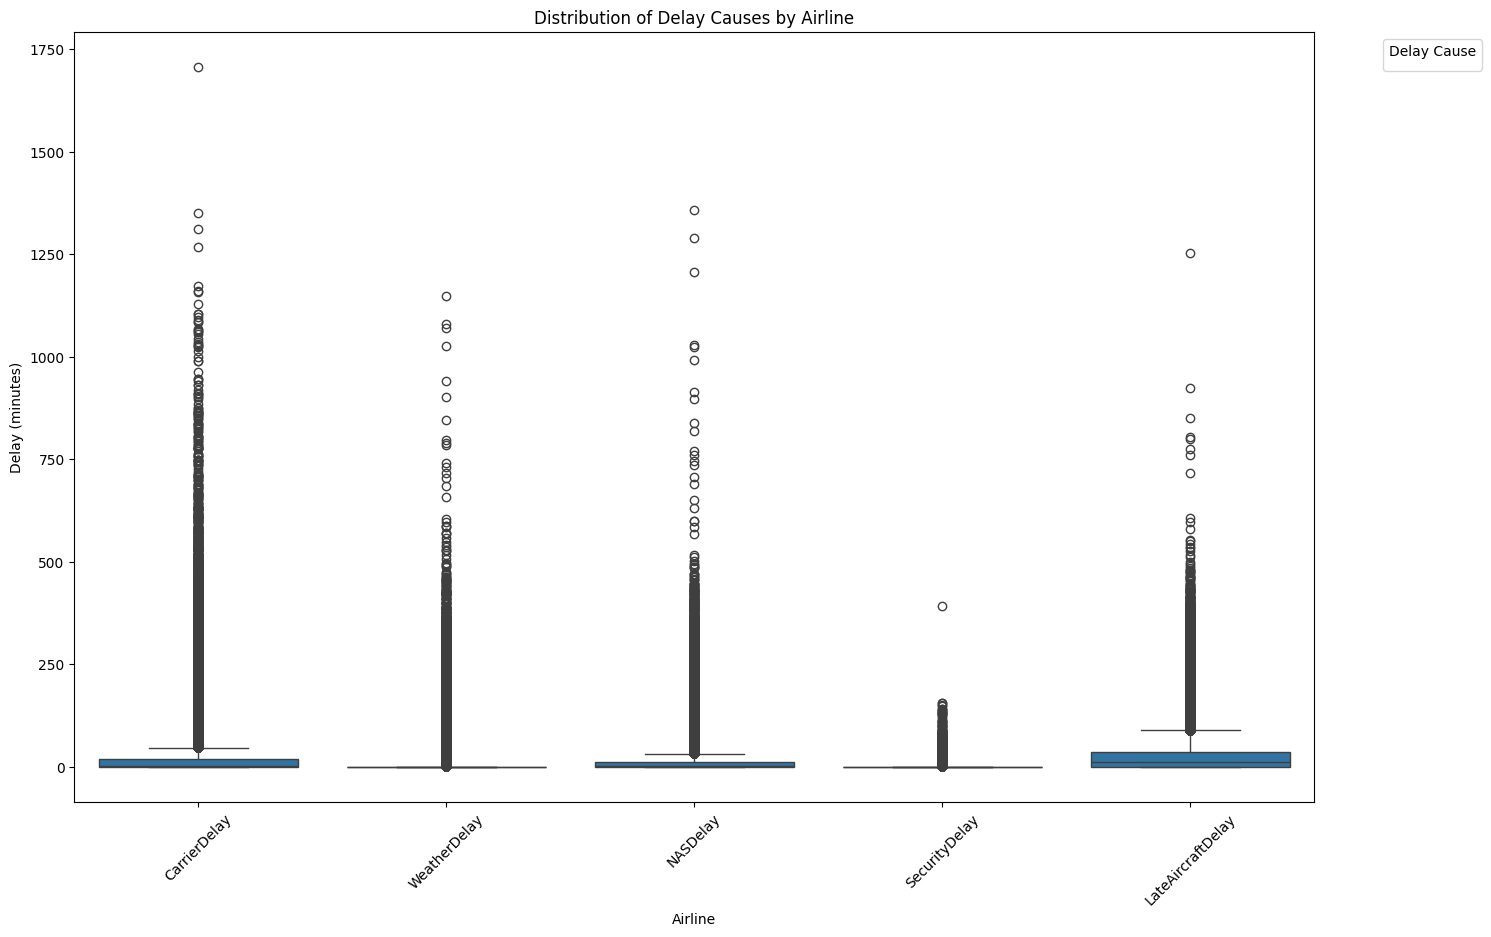

In [0]:
# Boxplot: Distribution of each delay cause by airline
plt.figure(figsize=(16,10))
sns.boxplot(data=data.melt(id_vars='Airline', value_vars=delay_causes, var_name='DelayCause', value_name='Delay'),x='DelayCause', y='Delay')
plt.title('Distribution of Delay Causes by Airline')
plt.xlabel('Airline')
plt.ylabel('Delay (minutes)')
plt.legend(title='Delay Cause', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

/home/spark-97b14bba-cf5e-431a-bfe0-f5/.ipykernel/2628/command-4749882578840944-2686576120:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_delay_by_airline, x='Airline', y='TotalDelay', palette='Reds_d')


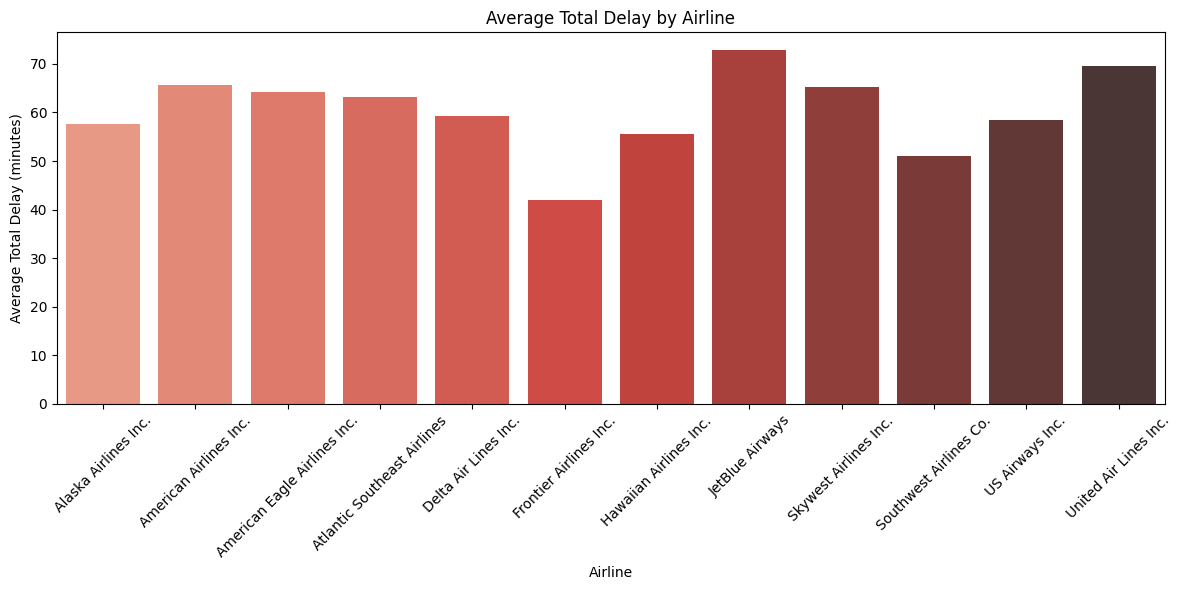

In [0]:

# Explore if certain airlines have higher total delays
data['TotalDelay'] = data[delay_causes].sum(axis=1)
total_delay_by_airline = data.groupby('Airline')['TotalDelay'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=total_delay_by_airline, x='Airline', y='TotalDelay', palette='Reds_d')
plt.title('Average Total Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

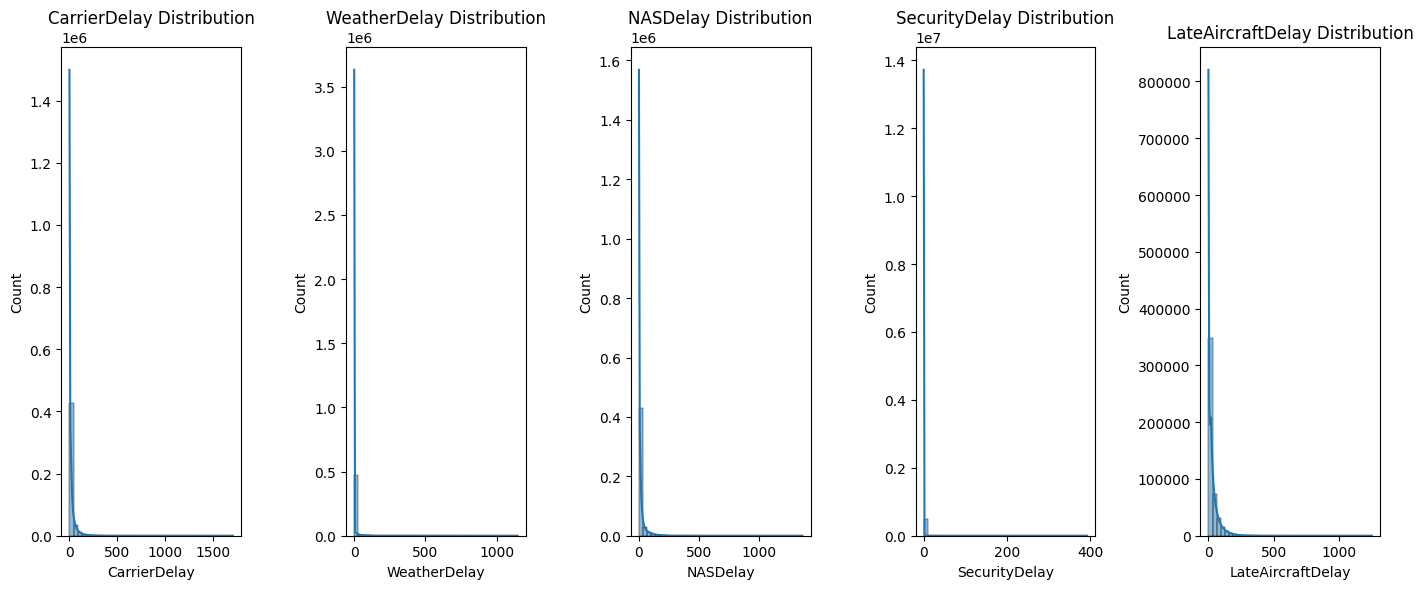

In [0]:
plt.figure(figsize=(14,6))
n=len(delay_causes)
for i, col in enumerate(delay_causes, 1):
    plt.subplot(1, n, i)
    sns.histplot(data[col], bins=40, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()



#### all of them are right skewed

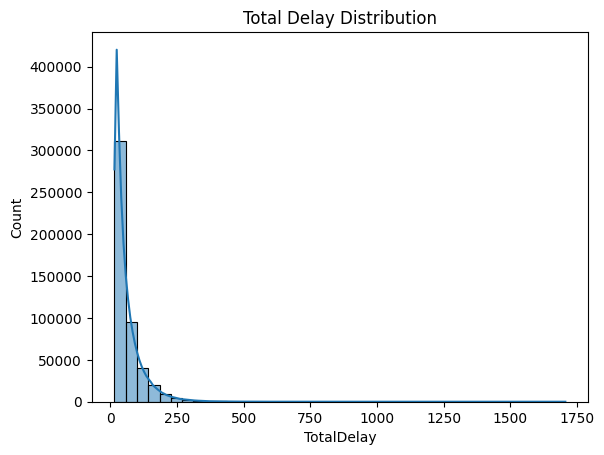

In [0]:
sns.histplot(data['TotalDelay'],bins=40,kde=True)
plt.title('Total Delay Distribution')
plt.show()

In [0]:
data.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Org_Airport,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route,TotalDelay
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,Indianapolis International Airport,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI,34
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,Indianapolis International Airport,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS,57
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,Indianapolis International Airport,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO,80
3,4,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,04:00,03:33,15,27,Indianapolis International Airport,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,3,1,2019,IND-PHX,15
4,4,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,02:15,01:50,16,28,Indianapolis International Airport,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,3,1,2019,IND-TPA,16


In [0]:

# Convert time and date columns
data['Hour'] = data['DepTime'].str.split(':').str[0].astype(int)

<Figure size 1200x600 with 0 Axes>

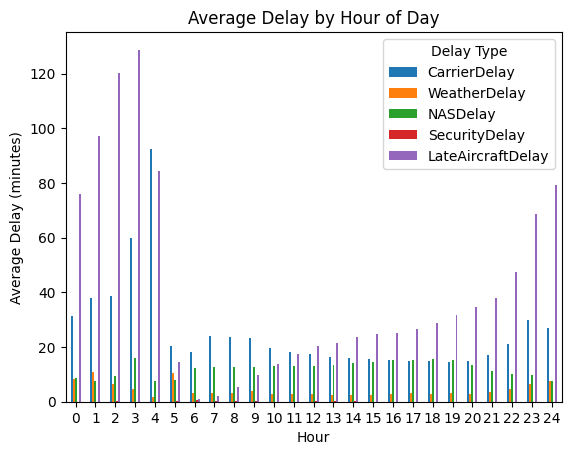

In [0]:
delay_by_hour = data.groupby('Hour')[delay_causes].mean()

plt.figure(figsize=(12,6))
delay_by_hour.plot(kind='bar')
plt.title('Average Delay by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.legend(title='Delay Type')

plt.show()


In [0]:
data.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Org_Airport,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route,TotalDelay,Hour
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,Indianapolis International Airport,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI,34,18
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,Indianapolis International Airport,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS,57,19
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,Indianapolis International Airport,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO,80,16
3,4,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,04:00,03:33,15,27,Indianapolis International Airport,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,3,1,2019,IND-PHX,15,14
4,4,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,02:15,01:50,16,28,Indianapolis International Airport,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,3,1,2019,IND-TPA,16,13


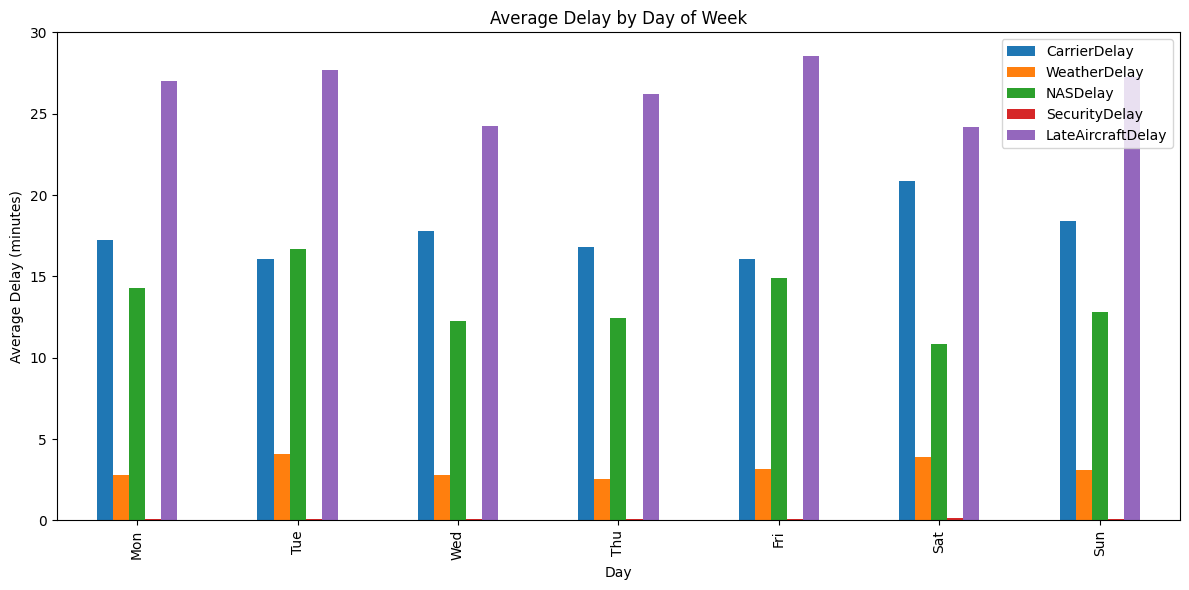

In [0]:
days = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',7:'Sun'}
data['DayName'] = data['DayOfWeek'].map(days)

delay_by_day = data.groupby('DayName')[delay_causes].mean()
delay_by_day = delay_by_day.reindex(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

delay_by_day.plot(kind='bar', figsize=(12,6))
plt.title('Average Delay by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()



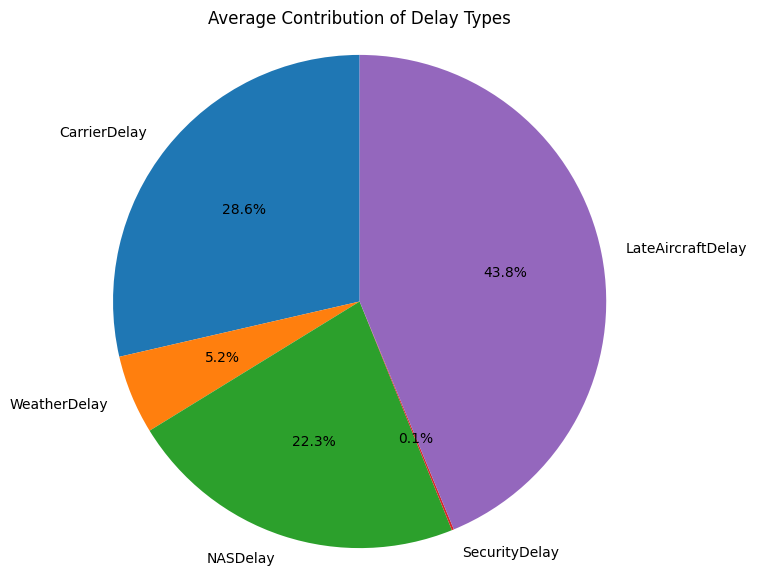

In [0]:
avg_delay_contribution = data[delay_causes].mean()
plt.figure(figsize=(7,7))
plt.pie(avg_delay_contribution, labels=delay_causes, autopct='%1.1f%%', startangle=90)
plt.title('Average Contribution of Delay Types')
plt.axis('equal')
plt.show()


In [0]:
data.head(5)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Org_Airport,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Day,Month,Year,Route,TotalDelay,Hour,DayName
0,4,2019-01-03,18:29,19:59,19:25,WN,Southwest Airlines Co.,3920,N464WN,01:30,01:30,01:17,34,34,Indianapolis International Airport,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,3,1,2019,IND-BWI,34,18,Thu
1,4,2019-01-03,19:37,20:37,19:40,WN,Southwest Airlines Co.,509,N763SW,04:00,04:10,03:50,57,67,Indianapolis International Airport,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,3,1,2019,IND-LAS,57,19,Thu
2,4,2019-01-03,16:44,18:45,17:25,WN,Southwest Airlines Co.,1333,N334SW,02:01,02:15,01:47,80,94,Indianapolis International Airport,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,3,1,2019,IND-MCO,80,16,Thu
3,4,2019-01-03,14:52,16:40,16:25,WN,Southwest Airlines Co.,675,N286WN,03:48,04:00,03:33,15,27,Indianapolis International Airport,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,3,1,2019,IND-PHX,15,14,Thu
4,4,2019-01-03,13:23,15:26,15:10,WN,Southwest Airlines Co.,4,N674AA,02:03,02:15,01:50,16,28,Indianapolis International Airport,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,3,1,2019,IND-TPA,16,13,Thu
